In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

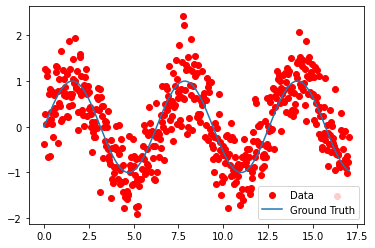

In [18]:
num_data = 500

X = np.linspace(0,17,num_data)
y = np.sin(X)  + np.random.normal(scale = 0.5, size = num_data)

plt.scatter(X,y, label = 'Data', c = 'r')
plt.plot(X,np.sin(X), label = "Ground Truth")
plt.legend()
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1),y)

In [4]:
model = DecisionTreeRegressor(max_depth =50)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=50)

In [5]:
((model.predict(X_train) - y_train)**2).mean()

0.0

In [6]:
((model.predict(X_test) - y_test)**2).mean()

0.54167453429328

In [7]:
orden = np.argsort(X_test[:,0])

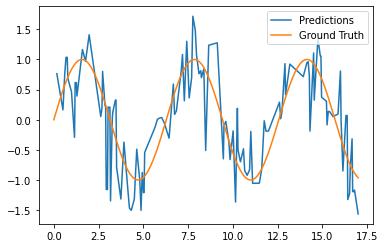

In [19]:
plt.plot(X_test[:,0][orden], 
            model.predict(X_test)[orden],
        label = "Predictions")

# plt.scatter(X_test, 
#             y_test, c = "r")
plt.plot(X,np.sin(X), label = "Ground Truth")

plt.legend()
plt.show()

In [9]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth =50),
                        n_estimators=1000, 
                        max_samples = 0.1).fit(X_train, y_train)

In [20]:
((regr.predict(X_train) - y_train)**2).mean()

0.22027387414112165

In [21]:
((regr.predict(X_test) - y_test)**2).mean()

0.30632625850797723

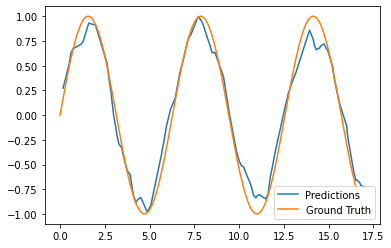

In [26]:
# plt.scatter(X_test, 
#             y_test, c = "r",
#            label = "Test data points")

plt.plot(X_test[:,0][np.argsort(X_test[:,0])], 
            regr.predict(X_test)[np.argsort(X_test[:,0])], 
        label = "Predictions")

plt.plot(X,np.sin(X), label = "Ground Truth")

plt.legend()
plt.show()